<a href="https://colab.research.google.com/github/AntoineCrypt0X/Python/blob/main/optimize_strategy_EMA_RSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Find the best two EMA parameters for the following strategy: Buy if STO RSI < 0.8 and an ascending EMA crossover occurs; sell if STO RSI > 0.2 and a descending EMA crossover occurs. On ETH/USDT pair

In [1]:
pip install python-binance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.7/113.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 42.2 MB/s eta 0:00:00


In [2]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=13c56ecbbaebf0c7ae0e3fd26918776fae0555618cc049a61f42db5b05b87f3f
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [11]:
import pandas as pd
from binance.client import Client
import ta
import matplotlib.pyplot as plt

client=Client(tld='us')

klinesT = client.get_historical_klines("ETHUSDT", Client.KLINE_INTERVAL_4HOUR, "15 March 2020")
df = pd.DataFrame(klinesT, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])

In [12]:
del df['ignore']
del df['close_time']
del df['quote_av']
del df['trades']
del df['tb_base_av']
del df['tb_quote_av']

df['close'] = pd.to_numeric(df['close'])
df['high'] = pd.to_numeric(df['high'])
df['low'] = pd.to_numeric(df['low'])
df['open'] = pd.to_numeric(df['open'])
#print(df)

In [13]:
df = df.set_index(df['timestamp'])
df.index = pd.to_datetime(df.index, unit='ms')

del df['timestamp']
print(df)

                        open     high      low    close        volume
timestamp                                                            
2020-03-15 00:00:00   122.59   123.31   120.76   120.76  156.69406000
2020-03-15 04:00:00   121.17   123.95   121.17   123.95  146.53337000
2020-03-15 08:00:00   122.80   126.15   121.89   126.15   80.58314000
2020-03-15 12:00:00   126.56   129.06   123.17   124.51  118.83445000
2020-03-15 16:00:00   124.62   124.79   122.74   123.15  170.14113000
...                      ...      ...      ...      ...           ...
2025-02-18 16:00:00  2674.06  2681.94  2609.12  2635.39  178.89100000
2025-02-18 20:00:00  2631.00  2671.26  2619.98  2671.26   40.61320000
2025-02-19 00:00:00  2670.41  2699.14  2656.43  2692.27  126.14630000
2025-02-19 04:00:00  2694.14  2714.96  2669.94  2709.39   84.77150000
2025-02-19 08:00:00  2710.41  2723.29  2707.05  2722.63   11.25120000

[10809 rows x 5 columns]


1. Between pre Bull run 2020 and post bear market 2022: 15 March 2020 to 15 June 2022

In [14]:
dfTest = df.copy()
dfTest = dfTest[:'2022-06-15']
dfTest['STOCH_RSI']=ta.momentum.stochrsi(dfTest['close'])
dfTest

,open,high,low,close,volume,STOCH_RSI
timestamp,,,,,,
2020-03-15 00:00:00,122.59,123.31,120.76,120.76,156.69406000,NaN
2020-03-15 04:00:00,121.17,123.95,121.17,123.95,146.53337000,NaN
2020-03-15 08:00:00,122.80,126.15,121.89,126.15,80.58314000,NaN
2020-03-15 12:00:00,126.56,129.06,123.17,124.51,118.83445000,NaN
2020-03-15 16:00:00,124.62,124.79,122.74,123.15,170.14113000,NaN
...,...,...,...,...,...,...
2022-06-15 04:00:00,1173.02,1174.90,1084.08,1094.44,2504.07713000,0.542735
2022-06-15 08:00:00,1093.47,1131.26,1014.26,1119.60,4651.65243000,0.717727
2022-06-15 12:00:00,1119.11,1159.15,1096.02,1119.90,2597.92208000,0.719872


     i   j        result
2   25  33   4774.973714
15  28  30   4806.735287
3   25  36   4962.888703
1   25  30   4967.382455
0   25  27   5154.913928
..  ..  ..           ...
68  40  51  14132.036254
60  37  57  14150.258767
69  40  54  15009.171829
84  46  48  15308.082105
77  43  51  16581.103833

[99 rows x 3 columns]
Buy and hold result 10265.982113282544 USDT


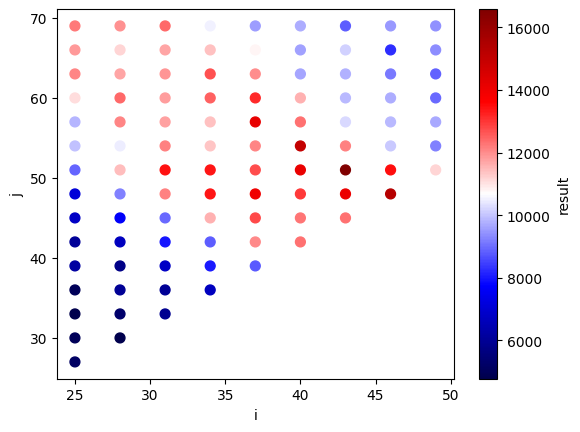

In [15]:
dt = pd.DataFrame(columns = ['i','j', 'result'])
count = 0
for i in range(25,50,3):
  dfTest["EMA1"] = ta.trend.ema_indicator(dfTest["close"],i)
  for j in range(i+2,70,3):
    dfTest["EMA2"] = ta.trend.ema_indicator(dfTest["close"],j)
    dfTest["EMA_HISTO"] = dfTest["EMA1"] - dfTest["EMA2"]

    usdt = 1000
    coin = 0
    fee = 0.0007

    for index, row in dfTest.iterrows():
      #Buy
      if row['EMA_HISTO'] > 0 and row['STOCH_RSI'] < 0.8 and  usdt > 0:
        coin = usdt / row['close'] - fee*usdt/row['close']
        usdt = 0
        #print("Buy ETH at ",df['close'][index]," || ",df['timestamp'][index])

      #SELL
      elif row['EMA_HISTO'] < 0 and row['STOCH_RSI'] > 0.2 and  coin > 0:
        usdt = coin*row["close"] - fee*coin*row['close']
        if usdt < 250:
          break
        coin = 0
        #print("Sell ETH at ",df['close'][index]," || ",df['timestamp'][index])

    myrow = {'i': i,'j': j, 'result': usdt + coin*dfTest.iloc[-1]['close']}
    dt.loc[len(dt)] = myrow

print(dt.sort_values(by=['result']))
print("Buy and hold result", (1000 / dfTest['close'].iloc[0]) * dfTest['close'].iloc[-1],'USDT')
dt.plot.scatter(x='i',y='j',c='result',s=50,colormap='seismic')
plt.show()

Best parameters: EMA 43 and EMA 51

Period : [2020-03-15 00:00:00] -> [2022-06-15 20:00:00]
Starting balance : 1000 $
Final balance : 16581.1 $
Performance vs US Dollar : 1558.11 %
Buy and Hold Performence : 926.6 %
Performance vs Buy and Hold : 68.15 %
Number of negative trades :  11
Number of positive trades :  13
Average Positive Trades :  39 %
Average Negative Trades :  -8 %
Best trade +155.68 %, the  2021-02-23 12:00:00
Worst trade -13.68 %, the  2021-12-04 12:00:00
Worst drawBack -28.74 %
Total fee :  247.69 $
PLOT


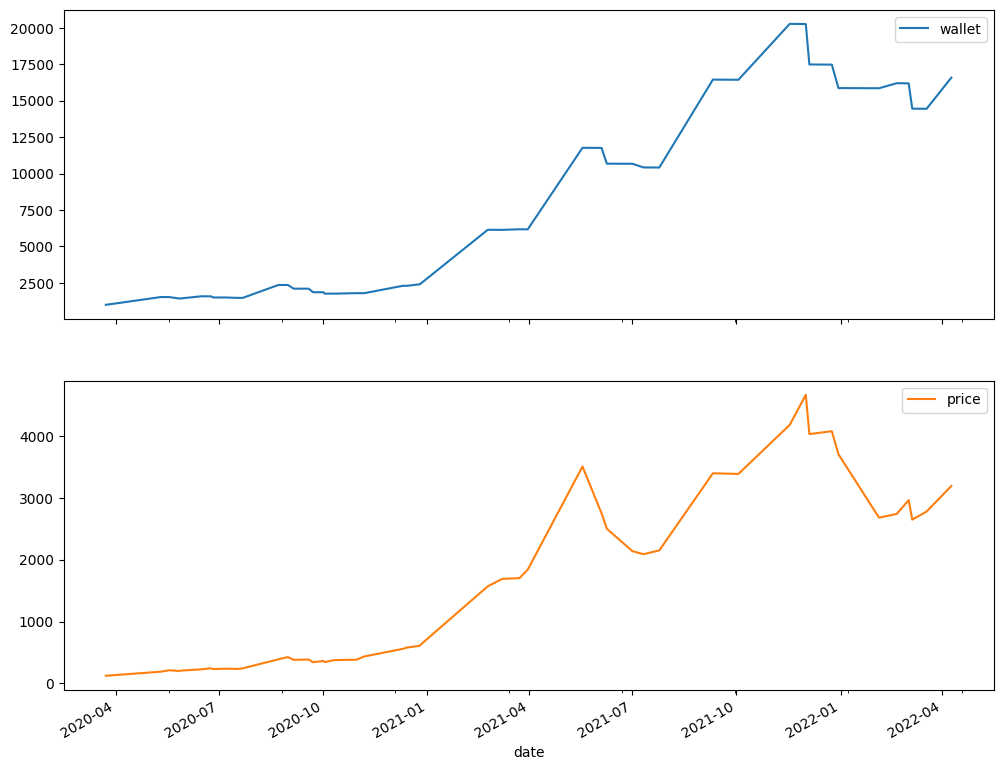

In [17]:
dt = None
dt = pd.DataFrame(columns = ['date','position', 'price', 'frais' ,'fiat', 'coins', 'wallet', 'drawBack'])

usdt = 1000
initalWallet = usdt
coin = 0
wallet = 1000
lastAth = 0
fee = 0.0007

dfTest['EMA43']=ta.trend.ema_indicator(dfTest['close'], 43)
dfTest['EMA51']=ta.trend.ema_indicator(dfTest['close'], 51)

for index, row in dfTest.iterrows():
    #Buy
    if row['EMA43'] > row['EMA51'] and row['STOCH_RSI'] < 0.8 and  usdt > 0:
        coin = usdt / row['close']
        frais = fee * coin
        coin = coin - frais
        usdt = 0
        wallet = coin * row['close']
        if wallet > lastAth:
            lastAth = wallet
        #print("Buy COIN at",df['close'][index],'$ the', index)
        myrow = {'date': index,'position': "Buy",'price': row['close'],'frais': frais * row['close'],'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
        dt.loc[len(dt)] = myrow

    #Sell
    if row['EMA43'] < row['EMA51'] and row['STOCH_RSI'] > 0.2 and coin > 0:
        usdt = coin * row['close']
        frais = fee * usdt
        usdt = usdt - frais
        coin = 0
        wallet = usdt
        if wallet > lastAth:
            lastAth = wallet
        #print("Sell COIN at",df['close'][index],'$ the', index)
        myrow = {'date': index,'position': "Sell",'price': row['close'],'frais': frais,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
        dt.loc[len(dt)] = myrow

wallet = usdt + coin*dfTest.iloc[len(dfTest)-1]['close']
#///////////////////////////////////////
print("Period : [" + str(dfTest.index[0]) + "] -> [" + str(dfTest.index[-1]) + "]")
dt = dt.set_index(dt['date'])
dt.index = pd.to_datetime(dt.index)
dt['resultat'] = dt['wallet'].diff()
dt['resultat%'] = dt['wallet'].pct_change()*100
dt.loc[dt['position']=='Buy','resultat'] = None
dt.loc[dt['position']=='Buy','resultat%'] = None
#print(dt)

dt['tradeIs'] = ''
dt.loc[dt['resultat']>0,'tradeIs'] = 'Good'
dt.loc[dt['resultat']<=0,'tradeIs'] = 'Bad'

iniClose = dfTest.iloc[0]['close']
lastClose = dfTest.iloc[-1]['close']
holdPorcentage = ((lastClose - iniClose)/iniClose) * 100
algoPorcentage = ((wallet - initalWallet)/initalWallet) * 100
vsHoldPorcentage = ((algoPorcentage - holdPorcentage)/holdPorcentage) * 100

print("Starting balance : 1000 $")
print("Final balance :",round(wallet,2),"$")
print("Performance vs US Dollar :",round(algoPorcentage,2),"%")
print("Buy and Hold Performence :",round(holdPorcentage,2),"%")
print("Performance vs Buy and Hold :",round(vsHoldPorcentage,2),"%")
print("Number of negative trades : ",dt.groupby('tradeIs')['date'].nunique()['Bad'])
print("Number of positive trades : ",dt.groupby('tradeIs')['date'].nunique()['Good'])
print("Average Positive Trades : ",round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].mean()),"%")
print("Average Negative Trades : ",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].mean()),"%")
idbest = dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].idxmax()
idworst = dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].idxmin()
print("Best trade +"+str(round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].max(),2)),"%, the ",dt['date'][idbest])
print("Worst trade",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].min(),2),"%, the ",dt['date'][idworst])
print("Worst drawBack", str(round(100*dt['drawBack'].min(),2)),"%")
print("Total fee : ",round(dt['frais'].sum(),2),"$")

dt[['wallet','price']].plot(subplots=True, figsize=(12,10))
print('PLOT')

Focus on bull run period. From 15 March 2020 to 15 November 2021

In [19]:
dfTest = df.copy()
dfTest = dfTest[:'2021-11-15']
dfTest['STOCH_RSI']=ta.momentum.stochrsi(dfTest['close'])
dfTest

,open,high,low,close,volume,STOCH_RSI
timestamp,,,,,,
2020-03-15 00:00:00,122.59,123.31,120.76,120.76,156.69406000,NaN
2020-03-15 04:00:00,121.17,123.95,121.17,123.95,146.53337000,NaN
2020-03-15 08:00:00,122.80,126.15,121.89,126.15,80.58314000,NaN
2020-03-15 12:00:00,126.56,129.06,123.17,124.51,118.83445000,NaN
2020-03-15 16:00:00,124.62,124.79,122.74,123.15,170.14113000,NaN
...,...,...,...,...,...,...
2021-11-15 04:00:00,4704.84,4724.67,4677.90,4682.48,296.62077000,0.879888
2021-11-15 08:00:00,4681.33,4746.06,4660.27,4718.61,244.42571000,1.000000
2021-11-15 12:00:00,4721.28,4770.70,4631.73,4651.22,775.76544000,0.616225


     i   j        result
1   25  30   9500.872036
0   25  27   9784.156446
2   25  33   9922.863823
15  28  30  10017.620441
3   25  36  11032.810759
..  ..  ..           ...
34  31  48  20359.090744
47  34  51  20641.322385
46  34  48  21008.044080
35  31  51  21072.371800
77  43  51  22111.384212

[99 rows x 3 columns]
Buy and hold result 37768.21795296456 USDT


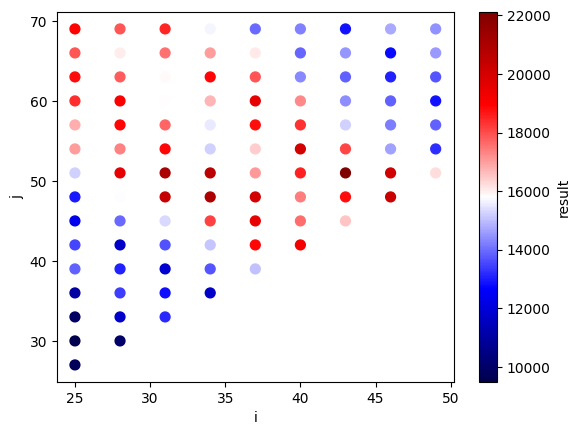

In [20]:
dt = None
dt = pd.DataFrame(columns = ['i','j', 'result'])
count = 0
for i in range(25,50,3):
  dfTest["EMA1"] = ta.trend.ema_indicator(dfTest["close"],i)
  for j in range(i+2,70,3):
    dfTest["EMA2"] = ta.trend.ema_indicator(dfTest["close"],j)
    dfTest["EMA_HISTO"] = dfTest["EMA1"] - dfTest["EMA2"]

    usdt = 1000
    coin = 0
    fee = 0.0007

    for index, row in dfTest.iterrows():
      #Buy
      if row['EMA_HISTO'] > 0 and row['STOCH_RSI'] < 0.8 and  usdt > 0:
        coin = usdt / row['close'] - fee*usdt/row['close']
        usdt = 0
        #print("Buy ETH at ",dfTest['close'][index]," || ", index, "coin ", coin)

      #SELL
      elif row['EMA_HISTO'] < 0 and row['STOCH_RSI'] > 0.2 and  coin > 0:
        usdt = coin*row["close"] - fee*coin*row['close']
        if usdt < 100:
          break
        coin = 0
        #print("Sell ETH at ",df['close'][index]," || ",index, "USDT ", usdt)


    myrow = {'i': i,'j': j, 'result': usdt + coin*dfTest.iloc[-1]['close']}
    dt.loc[len(dt)] = myrow
print(dt.sort_values(by=['result']))
print("Buy and hold result", (1000 / dfTest['close'].iloc[0]) * dfTest['close'].iloc[-1],'USDT')
dt.plot.scatter(x='i',y='j',c='result',s=50,colormap='seismic')
plt.show()

Best parameters: EMA 43 and EMA 51

Period : [2020-03-15 00:00:00] -> [2021-11-15 20:00:00]
Starting balance : 1000 $
Final balance : 22111.38 $
Performance vs US Dollar : 2111.14 %
Buy and Hold Performence : 3676.82 %
Performance vs Buy and Hold : -42.58 %
Number of negative trades :  8
Number of positive trades :  10
Average Positive Trades :  46.3 %
Average Negative Trades :  -6.47 %
Best trade +155.68 %, the  2021-02-23 12:00:00
Worst trade -11.49 %, the  2020-09-22 08:00:00
Worst drawBack -25.0 %
Total fee :  118.04 $
PLOT


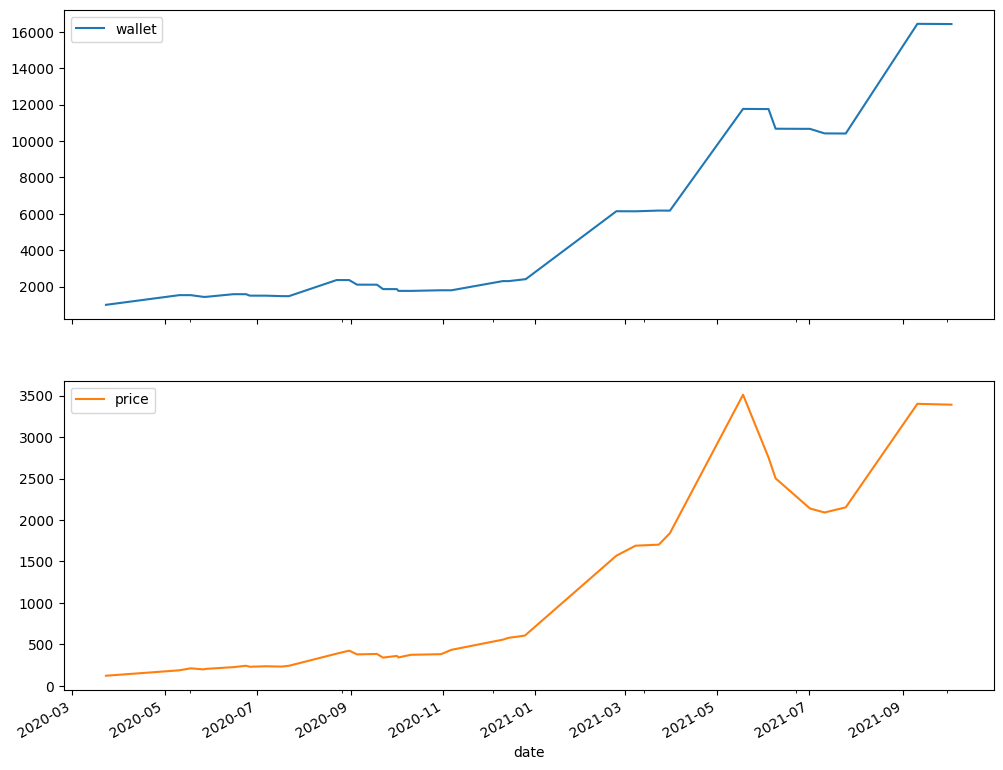

In [21]:
dt = None
dt = pd.DataFrame(columns = ['date','position', 'price', 'frais' ,'fiat', 'coins', 'wallet', 'drawBack'])

usdt = 1000
initalWallet = usdt
coin = 0
wallet = 1000
lastAth = 0
lastIndex = df.first_valid_index()
fee = 0.0007

dfTest['EMA43']=ta.trend.ema_indicator(dfTest['close'], 43)
dfTest['EMA51']=ta.trend.ema_indicator(dfTest['close'], 51)

for index, row in dfTest.iterrows():
    #Buy
    if row['EMA43'] > row['EMA51'] and row['STOCH_RSI'] < 0.8 and  usdt > 0:
        coin = usdt / row['close']
        frais = fee * coin
        coin = coin - frais
        usdt = 0
        wallet = coin * row['close']
        if wallet > lastAth:
            lastAth = wallet
        #print("Buy COIN at",df['close'][index],'$ the', index)
        myrow = {'date': index,'position': "Buy",'price': row['close'],'frais': frais * row['close'],'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
        dt.loc[len(dt)] = myrow

    #Sell
    if row['EMA43'] < row['EMA51'] and row['STOCH_RSI'] > 0.2 and coin > 0:
        usdt = coin * row['close']
        frais = fee * usdt
        usdt = usdt - frais
        coin = 0
        wallet = usdt
        if wallet > lastAth:
            lastAth = wallet
        #print("Sell COIN at",df['close'][index],'$ the', index)
        myrow = {'date': index,'position': "Sell",'price': row['close'],'frais': frais,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
        dt.loc[len(dt)] = myrow

    lastIndex = index

wallet = usdt + coin*dfTest.iloc[len(dfTest)-1]['close']
#///////////////////////////////////////
print("Period : [" + str(dfTest.index[0]) + "] -> [" + str(dfTest.index[len(dfTest)-1]) + "]")
dt = dt.set_index(dt['date'])
dt.index = pd.to_datetime(dt.index)

dt['resultat'] = dt['wallet'].diff()
dt['resultat%'] = dt['wallet'].pct_change()*100
dt.loc[dt['position']=='Buy','resultat'] = None
dt.loc[dt['position']=='Buy','resultat%'] = None

dt['tradeIs'] = ''
dt.loc[dt['resultat']>0,'tradeIs'] = 'Good'
dt.loc[dt['resultat']<=0,'tradeIs'] = 'Bad'

iniClose = dfTest.iloc[0]['close']
lastClose = dfTest.iloc[len(dfTest)-1]['close']
holdPorcentage = ((lastClose - iniClose)/iniClose) * 100
algoPorcentage = ((wallet - initalWallet)/initalWallet) * 100
vsHoldPorcentage = ((algoPorcentage - holdPorcentage)/holdPorcentage) * 100

print("Starting balance : 1000 $")
print("Final balance :",round(wallet,2),"$")
print("Performance vs US Dollar :",round(algoPorcentage,2),"%")
print("Buy and Hold Performence :",round(holdPorcentage,2),"%")
print("Performance vs Buy and Hold :",round(vsHoldPorcentage,2),"%")
print("Number of negative trades : ",dt.groupby('tradeIs')['date'].nunique()['Bad'])
print("Number of positive trades : ",dt.groupby('tradeIs')['date'].nunique()['Good'])
print("Average Positive Trades : ",round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].sum()/dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].count(),2),"%")
print("Average Negative Trades : ",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].sum()/dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].count(),2),"%")
idbest = dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].idxmax()
idworst = dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].idxmin()
print("Best trade +"+str(round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].max(),2)),"%, the ",dt['date'][idbest])
print("Worst trade",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].min(),2),"%, the ",dt['date'][idworst])
print("Worst drawBack", str(100*round(dt['drawBack'].min(),2)),"%")
print("Total fee : ",round(dt['frais'].sum(),2),"$")

dt[['wallet','price']].plot(subplots=True, figsize=(12,10))
print('PLOT')

3. Focus on bear market period. From 15 November 2021 to 15 June 2022

In [22]:
dfTest = df.copy()
dfTest = dfTest['2021-11-15':'2022-06-15']
dfTest['STOCH_RSI']=ta.momentum.stochrsi(dfTest['close'])
dfTest

,open,high,low,close,volume,STOCH_RSI
timestamp,,,,,,
2021-11-15 00:00:00,4627.05,4724.28,4627.05,4701.70,583.90528000,NaN
2021-11-15 04:00:00,4704.84,4724.67,4677.90,4682.48,296.62077000,NaN
2021-11-15 08:00:00,4681.33,4746.06,4660.27,4718.61,244.42571000,NaN
2021-11-15 12:00:00,4721.28,4770.70,4631.73,4651.22,775.76544000,NaN
2021-11-15 16:00:00,4649.09,4658.21,4566.61,4597.71,519.50882000,NaN
...,...,...,...,...,...,...
2022-06-15 04:00:00,1173.02,1174.90,1084.08,1094.44,2504.07713000,0.542735
2022-06-15 08:00:00,1093.47,1131.26,1014.26,1119.60,4651.65243000,0.717727
2022-06-15 12:00:00,1119.11,1159.15,1096.02,1119.90,2597.92208000,0.719872


     i   j      result
18  28  39  483.076993
4   25  39  485.689485
17  28  36  488.031212
5   25  42  488.582727
29  31  33  489.026166
..  ..  ..         ...
76  43  48  818.793302
39  31  63  818.793302
60  37  57  821.397148
84  46  48  822.046499
68  40  51  832.047603

[99 rows x 3 columns]
Buy and hold result 263.67484101495205 USDT


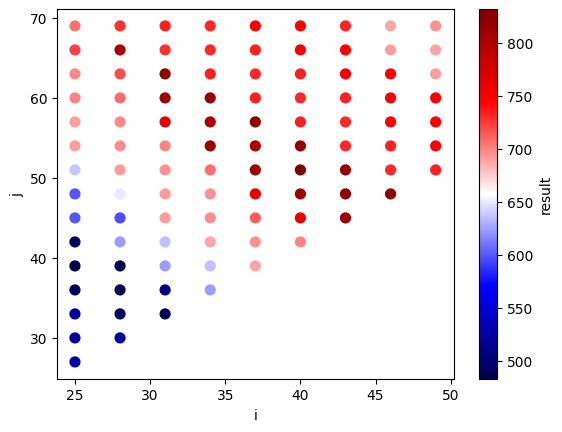

In [23]:
dt = None
dt = pd.DataFrame(columns = ['i','j', 'result'])
count = 0
for i in range(25,50,3):
  dfTest["EMA1"] = ta.trend.ema_indicator(dfTest["close"],i)
  for j in range(i+2,70,3):
    dfTest["EMA2"] = ta.trend.ema_indicator(dfTest["close"],j)
    dfTest["EMA_HISTO"] = dfTest["EMA1"] - dfTest["EMA2"]

    usdt = 1000
    coin = 0
    fee = 0.0007

    for index, row in dfTest.iterrows():
      #Buy
      if row['EMA_HISTO'] > 0 and row['STOCH_RSI'] < 0.8 and  usdt > 0:
        coin = usdt / row['close'] - fee*usdt/row['close']
        usdt = 0
        #print("Buy ETH at ",dfTest['close'][index]," || ", index, "coin ", coin)

      #SELL
      elif row['EMA_HISTO'] < 0 and row['STOCH_RSI'] > 0.2 and  coin > 0:
        usdt = coin*row["close"] - fee*coin*row['close']
        if usdt < 100:
          break
        coin = 0
        #print("Sell ETH at ",df['close'][index]," || ",index, "USDT ", usdt)


    myrow = {'i': i,'j': j, 'result': usdt + coin*dfTest.iloc[-1]['close']}
    dt.loc[len(dt)] = myrow
print(dt.sort_values(by=['result']))
print("Buy and hold result", (1000 / dfTest['close'].iloc[0]) * dfTest['close'].iloc[-1],'USDT')
dt.plot.scatter(x='i',y='j',c='result',s=50,colormap='seismic')
plt.show()

Best parameters: EMA 40 and EMA 51

Period : [2021-11-15 00:00:00] -> [2022-06-15 20:00:00]
Starting balance : 1000 $
Final balance : 832.05 $
Performance vs US Dollar : -16.8 %
Buy and Hold Performence : -73.63 %
Performance vs Buy and Hold : -77.19 %
Number of negative trades :  3
Number of positive trades :  2
Average Positive Trades :  9.51 %
Average Negative Trades :  -11.24 %
Best trade +16.2 %, the  2022-04-08 16:00:00
Worst trade -13.68 %, the  2021-12-04 12:00:00
Worst drawBack -28.35 %
Total fee :  5.71 $
PLOT


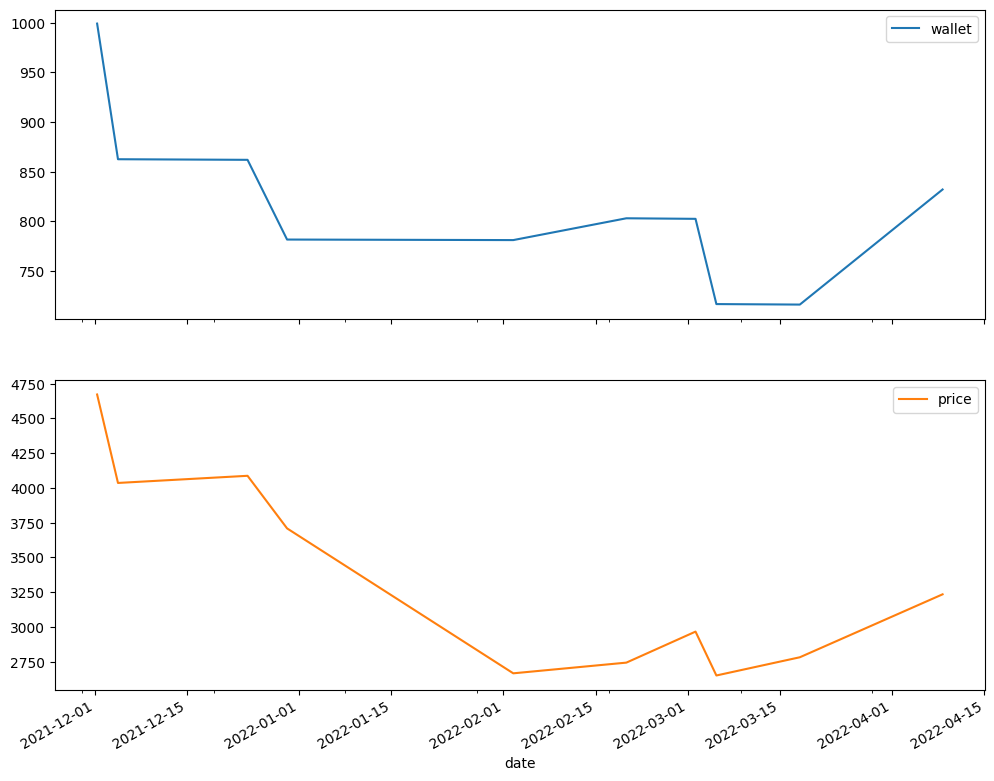

In [25]:
dt = None
dt = pd.DataFrame(columns = ['date','position', 'price', 'frais' ,'fiat', 'coins', 'wallet', 'drawBack'])

usdt = 1000
initalWallet = usdt
coin = 0
wallet = 1000
lastAth = 0
lastIndex = df.first_valid_index()
fee = 0.0007

dfTest['EMA40']=ta.trend.ema_indicator(dfTest['close'], 40)
dfTest['EMA51']=ta.trend.ema_indicator(dfTest['close'], 51)

for index, row in dfTest.iterrows():
    #Buy
    if row['EMA40'] > row['EMA51'] and row['STOCH_RSI'] < 0.8 and  usdt > 0:
        coin = usdt / row['close']
        frais = fee * coin
        coin = coin - frais
        usdt = 0
        wallet = coin * row['close']
        if wallet > lastAth:
            lastAth = wallet
        #print("Buy COIN at",df['close'][index],'$ the', index)
        myrow = {'date': index,'position': "Buy",'price': row['close'],'frais': frais * row['close'],'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
        dt.loc[len(dt)] = myrow

    #Sell
    if row['EMA40'] < row['EMA51'] and row['STOCH_RSI'] > 0.2 and coin > 0:
        usdt = coin * row['close']
        frais = fee * usdt
        usdt = usdt - frais
        coin = 0
        wallet = usdt
        if wallet > lastAth:
            lastAth = wallet
        #print("Sell COIN at",df['close'][index],'$ the', index)
        myrow = {'date': index,'position': "Sell",'price': row['close'],'frais': frais,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
        dt.loc[len(dt)] = myrow

    lastIndex = index

wallet = usdt + coin*dfTest.iloc[len(dfTest)-1]['close']
#///////////////////////////////////////
print("Period : [" + str(dfTest.index[0]) + "] -> [" + str(dfTest.index[len(dfTest)-1]) + "]")
dt = dt.set_index(dt['date'])
dt.index = pd.to_datetime(dt.index)

dt['resultat'] = dt['wallet'].diff()
dt['resultat%'] = dt['wallet'].pct_change()*100
dt.loc[dt['position']=='Buy','resultat'] = None
dt.loc[dt['position']=='Buy','resultat%'] = None

dt['tradeIs'] = ''
dt.loc[dt['resultat']>0,'tradeIs'] = 'Good'
dt.loc[dt['resultat']<=0,'tradeIs'] = 'Bad'

iniClose = dfTest.iloc[0]['close']
lastClose = dfTest.iloc[len(dfTest)-1]['close']
holdPorcentage = ((lastClose - iniClose)/iniClose) * 100
algoPorcentage = ((wallet - initalWallet)/initalWallet) * 100
vsHoldPorcentage = ((algoPorcentage - holdPorcentage)/holdPorcentage) * 100

print("Starting balance : 1000 $")
print("Final balance :",round(wallet,2),"$")
print("Performance vs US Dollar :",round(algoPorcentage,2),"%")
print("Buy and Hold Performence :",round(holdPorcentage,2),"%")
print("Performance vs Buy and Hold :",round(vsHoldPorcentage,2),"%")
print("Number of negative trades : ",dt.groupby('tradeIs')['date'].nunique()['Bad'])
print("Number of positive trades : ",dt.groupby('tradeIs')['date'].nunique()['Good'])
print("Average Positive Trades : ",round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].sum()/dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].count(),2),"%")
print("Average Negative Trades : ",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].sum()/dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].count(),2),"%")
idbest = dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].idxmax()
idworst = dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].idxmin()
print("Best trade +"+str(round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].max(),2)),"%, the ",dt['date'][idbest])
print("Worst trade",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].min(),2),"%, the ",dt['date'][idworst])
print("Worst drawBack", str(round(100*dt['drawBack'].min(),2)),"%")
print("Total fee : ",round(dt['frais'].sum(),2),"$")

dt[['wallet','price']].plot(subplots=True, figsize=(12,10))
print('PLOT')